# DSR - Batch 32 - Mini competition 
DRIVERDATA
https://www.drivendata.org/competitions/44/dengai-predicting-disease-spread/page/82/

## Prelude
## Making a cosy work environment
i.e. moving the desks around so we can be next to each other

## How do we want to work together?
Quick iterative process

## Defining strategy

### Day 1
- Define what kind of problem we're dealing with
- Data cleaning
    - columns analyzed to get sense of robustness
    - cleaning ideas
- Data visualization
- Develop pipeline 
 - Cleaning
 - Transformation / encoding
 - Model Training 
 - Model Fitting
- Baseline models ready and scored

### Day 2
- Feature engineering
- Model Twiking

### Day 3
- Last twiking
- Preparing presentaion

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE, SMOTENC

range(0, 935, 40)
None
Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            926, 927, 928, 929, 930, 931, 932, 933, 934, 935],
           dtype='int64', length=936)
Int64Index([ 26,  27,  29,  30,  31,  32,  66,  67,  68,  69,
            ...
            902, 903, 904, 905, 906, 907, 908, 909, 910, 911],
           dtype='int64', length=185)
26     0.123644
27     0.154013
29     0.121475
30     0.114967
31     0.112798
         ...   
907    0.292842
908    0.229935
909    0.147505
910    0.104121
911    0.104121
Name: total_cases_normalized, Length: 185, dtype: float64


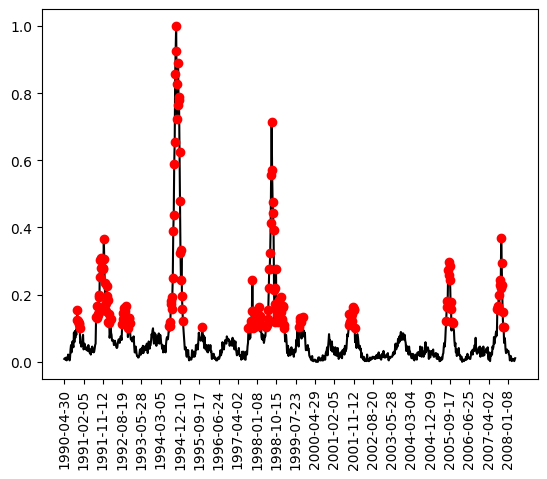

range(936, 1455, 40)
None
Int64Index([ 936,  937,  938,  939,  940,  941,  942,  943,  944,  945,
            ...
            1446, 1447, 1448, 1449, 1450, 1451, 1452, 1453, 1454, 1455],
           dtype='int64', length=520)
Int64Index([1016, 1017, 1018, 1019, 1020, 1029, 1030, 1032, 1035, 1049, 1051,
            1052, 1053, 1054, 1055, 1056, 1057, 1058, 1059, 1060, 1062, 1063,
            1064, 1142, 1146, 1156, 1157, 1159, 1160, 1162, 1163, 1164, 1165,
            1166, 1167, 1168, 1180, 1183, 1184, 1188, 1216, 1223, 1224, 1226,
            1227, 1228, 1229, 1230, 1231, 1234, 1235, 1268, 1275, 1279, 1322,
            1323, 1324, 1326, 1327, 1328, 1329, 1330, 1331, 1332, 1333, 1334,
            1335, 1362, 1363, 1364, 1365, 1366, 1367, 1368, 1369, 1370, 1371,
            1372, 1373, 1375, 1381, 1382, 1383, 1384, 1385, 1386, 1433, 1434,
            1436, 1437, 1438, 1439, 1440, 1441],
           dtype='int64')
1016    0.137931
1017    0.198276
1018    0.103448
1019    0.120690
1020    

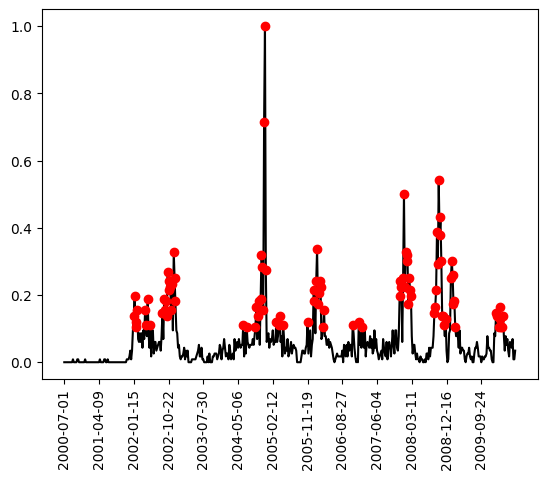

0.0    1177
1.0     279
Name: peak, dtype: int64


In [27]:
def add_norm_cases_and_peak_to_df(
    X, 
    Y,
    ):
    peak_threshold = 0.1
    #Creating one DataFrame with Data and Target
    X['total_cases']=Y['total_cases']

    #Adding one normalized column target
    #need to be done city by city - > 0 means no case, 1 mine max number of case for that city
    X['total_cases_normalized']=Y['total_cases']
    cities = X['city'].unique()
    for c in cities:
        ## converting numbers / ratio with inhabitants
        maxhere= Y['total_cases'].loc[Y['city']==c].max()
        indices = Y['total_cases'].loc[Y['city']==c].index
        date = X['week_start_date'].loc[Y['city']==c]
        for i in indices:
            X.loc[i, 'total_cases_normalized'] = (Y.loc[i, 'total_cases'])/maxhere

        # plotr to check the transformation
        # plt.plot(Y['total_cases'].loc[Y['city']==c])
        plt.show()
        plt.plot(
            date.loc[indices], X.loc[indices, 'total_cases_normalized'], 
            color = 'black'
        )
        tick_select = range(min(indices), max(indices), 40)
        # print(print(tick_select))
        # print(indices)
        plt.xticks(date.loc[tick_select], rotation="vertical")

        log_peak = X.loc[indices, 'total_cases_normalized']>peak_threshold
        # print(indices[log_peak])
        # indices[log_peak]
        # print(X.loc[indices[log_peak],'total_cases_normalized'])
        plt.plot(
            date.loc[indices[log_peak]], 
            X.loc[indices[log_peak],'total_cases_normalized'], 
            'o', color='red'
        )
        plt.show()

    #adding "peak" column to dataframe -> defined to categorize the target as epidemic peak (1) or not ()0
    X['peak']=X['total_cases_normalized']
    X.loc[(X['total_cases_normalized']>=peak_threshold, 'peak')]=1
    X.loc[(X['total_cases_normalized']<peak_threshold, 'peak')]=0
    
    print(X['peak'].value_counts())
    return X

# def oversample_smote_X_Y(X, Y, on='peak'):
##
official_trainX = pd.read_csv("./data/dengue_features_train.csv")
official_trainY = pd.read_csv("./data/dengue_labels_train.csv")

combined_X_Y = add_norm_cases_and_peak_to_df(official_trainX, official_trainY)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
enc.fit(combined_X_Y.loc[:,['city', 'week_start_date']])
combined_X_Y.loc[:,['city', 'week_start_date']] = enc.transform(combined_X_Y.loc[:,['city', 'week_start_date']])


/var/folders/9q/5d2wg0rx1z5_sm6q_hs8ry940000gn/T/ipykernel_12275/2799886488.py:5: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  combined_X_Y.loc[:,['city', 'week_start_date']] = enc.transform(combined_X_Y.loc[:,['city', 'week_start_date']])


In [23]:
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

resampling_col = combined_X_Y.loc[:, "peak"]
combined_X_Y = combined_X_Y.drop(columns=["peak"])

pipe = make_pipeline(
    SimpleImputer(),
    SMOTE(sampling_strategy=0.5, random_state=42),
)
combined_X_Y.columns
upsampled_X, upsampled_y = pipe.fit_resample(combined_X_Y, resampling_col)
upsampled_X_df = pd.DataFrame(upsampled_X, combined_X_Y.columns)


ValueError: Shape of passed values is (1765, 25), indices imply (25, 25)

In [217]:
upsampled_X_df = pd.DataFrame(upsampled_X, columns=combined_X_Y.columns)
from_x_to_y = ['city', 'year', 'weekofyear', 'total_cases']
upsampled_Y_df = upsampled_X_df[from_x_to_y]

In [218]:
upsampled_X_df.head()

,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,...,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases_normalized,total_cases
0,0.0,1990.0,18.0,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,...,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,0.008677,4.0
1,0.0,1990.0,19.0,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,...,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,0.010846,5.0
2,0.0,1990.0,20.0,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,...,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,0.008677,4.0
3,0.0,1990.0,21.0,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,...,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,0.006508,3.0
4,0.0,1990.0,22.0,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,...,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,0.013015,6.0


In [219]:
upsampled_Y_df.head()

,city,year,weekofyear,total_cases
0,0.0,1990.0,18.0,4.0
1,0.0,1990.0,19.0,5.0
2,0.0,1990.0,20.0,4.0
3,0.0,1990.0,21.0,3.0
4,0.0,1990.0,22.0,6.0
